## Problem Set #8

MACS 30100, Dr. Evans 

Shuting Chen 

In [40]:
import numpy as np 
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import svm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

## 1. Neural network horse race 

### Part (a). 

In [41]:
# Import Data
drink = pd.read_csv('strongdrink.txt')
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


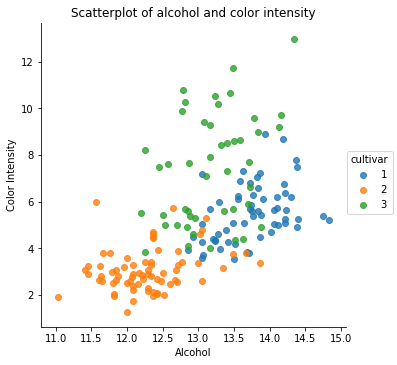

In [42]:
ax = sns.lmplot('alco','color_int', data=drink, fit_reg=False, hue = 'cultivar')
ax.set(xlabel='Alcohol', ylabel='Color Intensity', title='Scatterplot of alcohol and color intensity')
plt.show()

### Part (b). 

In [43]:
Xvals = drink[['alco', 'malic', 'tot_phen', 'color_int']].values
yvals = drink['cultivar'].values
k = 4
clf_mlog = KFold(n_splits=k, shuffle=True, random_state=22)
clf_mlog.get_n_splits(Xvals)
MSE = np.zeros(k)
C = np.zeros(200)
MSE_C = np.zeros(200)

for c in range(200):
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(Xvals):
        X_train, X_test = Xvals[train_index], Xvals[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]
        LogReg = LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg', C = (c/100 + 0.01))
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        error = y_test != y_pred
        MSE[k_ind] = error.mean()
        k_ind += 1
    C[c] = c/100 + 0.01
    MSE_C[c] =  MSE.mean()
MSE_multilog = pd.DataFrame({'C':C, 'MSE':MSE_C})

In [44]:
MSE_multilog.sort_values(['MSE']).head(25)

,C,MSE
43,0.44,0.068182
44,0.45,0.068182
42,0.43,0.068182
41,0.42,0.068182
40,0.41,0.068182
39,0.40,0.068182
27,0.28,0.068182
28,0.29,0.068182
29,0.30,0.068182
30,0.31,0.068182


Based on the results shown above, we can conclude that the multinomial logistic model has the smallest MSE of 0.068182 if we set the value of C between 0.28 and 0.44 with 'I2' penalty. 

### Part (c). 

In [45]:
MSE_rf = pd.DataFrame({"n_estimator" : np.zeros(5),
                         "min_sample_leaf" : np.zeros(5),
                         "max_depth" : np.zeros(5),
                         "MSE" : np.zeros(5)})
MSE_df = MSE_rf[:0]

for i in range(15):
    for j in range(15):
        for tree in range(5):
            rf = RandomForestClassifier(n_estimators = (tree * 50 + 50),
                                        min_samples_leaf = (i * 5 + 5),
                                        max_depth = (j + 1), bootstrap=True, 
                                        oob_score=True, random_state=22)
            rf.fit(Xvals, yvals)
            MSE_rf["n_estimator"][tree] = tree * 50 + 50
            MSE_rf["max_depth"][tree] = j + 1
            MSE_rf["min_sample_leaf"][tree] = i * 5 + 5
            MSE_rf["MSE"][tree] = 1 - rf.oob_score_
        MSE_df= pd.concat([MSE_df, MSE_rf])

In [46]:
MSE_df.index = range(len(MSE_df))
MSE_df.sort_values(['MSE']).head(20)

,MSE,max_depth,min_sample_leaf,n_estimator
96,0.068182,5.0,10.0,100.0
126,0.068182,11.0,10.0,100.0
116,0.068182,9.0,10.0,100.0
131,0.068182,12.0,10.0,100.0
111,0.068182,8.0,10.0,100.0
106,0.068182,7.0,10.0,100.0
121,0.068182,10.0,10.0,100.0
101,0.068182,6.0,10.0,100.0
136,0.068182,13.0,10.0,100.0
86,0.068182,3.0,10.0,100.0


Based on the results shown above, the random forest model has the smallest MSE of 0.068182 when max_depth = 5, min_sample_leaf = 10 and n_estimator = 100. 

### Part (d). 

In [47]:
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(Xvals)
MSE = np.zeros(k)
MSE_C = pd.DataFrame({"C" : np.zeros(80),
                      "G" : np.zeros(80),
                      "MSE" : np.zeros(80)})
MSE_SVM = MSE_C[:0]

for g in range(80):
    for c in range(80):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(Xvals):
            X_train, X_test = Xvals[train_index], Xvals[test_index]
            y_train, y_test = yvals[train_index], yvals[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            error = y_test != y_pred
            MSE[k_ind] = error.mean()
            k_ind += 1
        MSE_C['C'][c] = c/20 + 0.05
        MSE_C['G'][c] = g/20 + 0.05
        MSE_C['MSE'][c] =  MSE.mean()
    MSE_SVM = pd.concat([MSE_SVM, MSE_C])

In [48]:
MSE_SVM.index = range(len(MSE_SVM))
MSE_SVM.sort_values(['MSE']).head(25)

,C,G,MSE
2659,1.00,1.70,0.045455
2578,0.95,1.65,0.045455
2658,0.95,1.70,0.045455
224,3.25,0.15,0.051136
225,3.30,0.15,0.051136
226,3.35,0.15,0.051136
227,3.40,0.15,0.051136
228,3.45,0.15,0.051136
229,3.50,0.15,0.051136
218,2.95,0.15,0.051136


Based on the results shown above, the SVM model has the smallest MSE of 0.045455 when cost = 1, gamma = 1.7 (or cost = 0.95, gamma = 1.65, or cost = 0.95, gamma = 1.70).

### Part (e). 

In [49]:
k = 4
clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlp.get_n_splits(Xvals)
MSE = np.zeros(k)
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])
MSE_al = pd.DataFrame({'activation' : np.zeros(20),
                       'hidden layer' : np.zeros(20),
                       'alpha' : np.zeros(20),
                       'MSE':np.zeros(20)})
MSE_mlp = MSE_al[:0]

for ac in range(4):
    for h in range(8):
        for al in range(20):
            k_ind = int(0)
            for train_index, test_index in clf_mlp.split(Xvals):
                X_train, X_test = Xvals[train_index], Xvals[test_index]
                y_train, y_test = yvals[train_index], yvals[test_index]
                mlp = MLPClassifier(activation=activ[ac], solver='lbfgs',
                                    alpha=(al/20 + 0.05), 
                                    hidden_layer_sizes = ((50 * (h + 1)),))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                MSE[k_ind] = error.mean()
                k_ind += 1
            MSE_al['activation'][al] = activ[ac]
            MSE_al['hidden layer'][al] = 50 * (h + 1)
            MSE_al['alpha'][al] = al/20 + 0.05
            MSE_al['MSE'][al] =  MSE.mean()
        MSE_mlp = pd.concat([MSE_mlp, MSE_al])

In [50]:
MSE_mlp.index = range(len(MSE_mlp))
MSE_mlp.sort_values(['MSE']).head(25)

,MSE,activation,alpha,hidden layer
543,0.039773,relu,0.20,200.0
564,0.039773,relu,0.25,250.0
561,0.039773,relu,0.10,250.0
596,0.039773,relu,0.85,300.0
609,0.039773,relu,0.50,350.0
551,0.039773,relu,0.60,200.0
506,0.039773,relu,0.35,100.0
508,0.045455,relu,0.45,100.0
578,0.045455,relu,0.95,250.0
612,0.045455,relu,0.65,350.0


Baaed on the results shown above, the MLP model has the lowest MSE of 0.039773 when activation = relu, alpha = 0.20 and hidden layer = 200. 

### Part (f). 

In [51]:
logit = np.array(MSE_multilog.sort_values(['MSE']).head(5)['MSE'])
RF = np.array(MSE_df.sort_values(['MSE']).head(5)['MSE'])
SVM = np.array(MSE_SVM.sort_values(['MSE']).head(5)['MSE'])
mlp = np.array(MSE_mlp.sort_values(['MSE']).head(5)['MSE'])


Comp = pd.DataFrame({'Logit':logit, 
                     'RF':RF,
                     'SVM':SVM,
                     'MLP':mlp})
Comp

,Logit,MLP,RF,SVM
0,0.068182,0.039773,0.068182,0.045455
1,0.068182,0.039773,0.068182,0.045455
2,0.068182,0.039773,0.068182,0.045455
3,0.068182,0.039773,0.068182,0.051136
4,0.068182,0.039773,0.068182,0.051136


Comparing these four different models by their first five smallest MSE values, we can conclude that MLP neural network model is the best predictor of cultivar since it has the smallest MSE values among these models. 